In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_excel("hrdata.xlsx")
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
data=data.rename(columns={"average_montly_hours":"average_weekly_hours","sales":"department"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_weekly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
data["average_weekly_hours"]=data["average_weekly_hours"]*12/52
data.head()

,satisfaction_level,last_evaluation,number_project,average_weekly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,36.230769,3,0,1,0,sales,low
1,0.80,0.86,5,60.461538,6,0,1,0,sales,medium
2,0.11,0.88,7,62.769231,4,0,1,0,sales,medium
3,0.72,0.87,5,51.461538,5,0,1,0,sales,low
4,0.37,0.52,2,36.692308,3,0,1,0,sales,low


In [5]:
print(np.corrcoef(data["number_project"],data["average_weekly_hours"]))

[[1.         0.41721063]
 [0.41721063 1.        ]]


In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_weekly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,46.396232,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,11.525331,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,22.153846,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,36.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,46.153846,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,56.538462,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,71.538462,10.000000,1.000000,1.000000,1.000000


In [7]:
data[['Work_accident','left']].groupby(['Work_accident'], as_index=False).mean().sort_values(by='left',ascending=0)

,Work_accident,left
0,0,0.265160
1,1,0.077916


In [8]:
data[['department','left']].groupby(['department'], as_index=False).mean().sort_values('left',ascending=0)

,department,left
3,hr,0.290934
2,accounting,0.265971
9,technical,0.256250
8,support,0.248991
7,sales,0.244928
5,marketing,0.236597
0,IT,0.222494
6,product_mng,0.219512
1,RandD,0.153748
4,management,0.144444


In [9]:
data[['salary','left']].groupby(['salary'], as_index=False).mean().sort_values('left',ascending=0)

,salary,left
1,low,0.296884
2,medium,0.204313
0,high,0.066289


In [10]:
data[['number_project','left']].groupby(['number_project'], as_index=False).mean().sort_values('left',ascending=0)

,number_project,left
5,7,1.000000
0,2,0.656198
4,6,0.557922
3,5,0.221659
2,4,0.093700
1,3,0.017756


In [11]:
data[['time_spend_company','left']].groupby(['time_spend_company'], as_index=False).mean().sort_values('left',ascending=0)

,time_spend_company,left
3,5,0.565513
2,4,0.348064
4,6,0.291086
1,3,0.246159
0,2,0.016338
5,7,0.000000
6,8,0.000000
7,10,0.000000


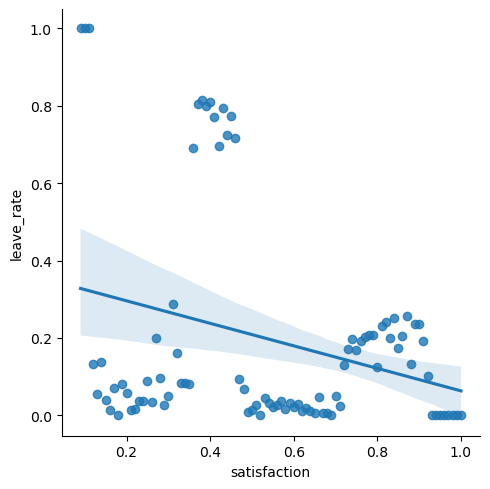

In [12]:
leave_sat = data.groupby('satisfaction_level').agg({'left':lambda x: len(x[x==1])})
leave_sat['total'] = data.groupby('satisfaction_level').agg({'left': len})
leave_sat['leave_rate'] = leave_sat['left']/leave_sat['total']
leave_sat['satisfaction'] = data.groupby('satisfaction_level').agg({'satisfaction_level':'mean'})
g = sns.lmplot(data=leave_sat,x='satisfaction',y='leave_rate')

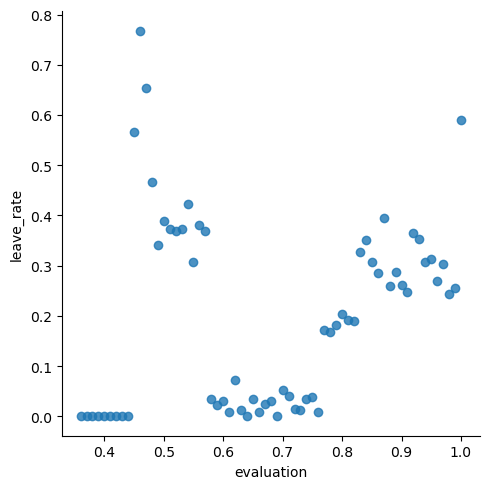

In [13]:
leave_eval = data.groupby('last_evaluation').agg({'left': lambda x: len(x[x==1])})
leave_eval['total'] = data.groupby('last_evaluation').agg({'left': len})
leave_eval['leave_rate'] = leave_eval['left']/leave_eval['total']
leave_eval['evaluation'] = data.groupby('last_evaluation').agg({'last_evaluation': 'mean'})
gr = sns.lmplot(data=leave_eval,x='evaluation',y='leave_rate',fit_reg=False)

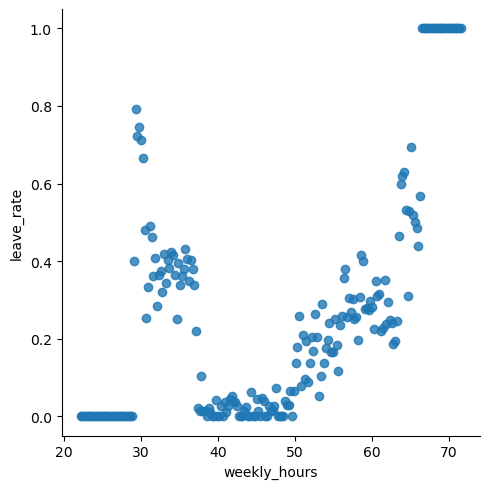

In [14]:
leave_hours = data.groupby('average_weekly_hours').agg({'left': lambda x: len(x[x==1])})
leave_hours['total'] = data.groupby('average_weekly_hours').agg({'left': len})
leave_hours['leave_rate'] = leave_hours['left']/leave_hours['total']
leave_hours['weekly_hours'] = data.groupby('average_weekly_hours').agg({'average_weekly_hours': 'mean'})
grid=sns.lmplot(data=leave_hours,x='weekly_hours', y='leave_rate',fit_reg=False)

In [15]:
data[['department','average_weekly_hours']].groupby(['department'], as_index=False).mean().sort_values('average_weekly_hours', ascending=False)

,department,average_weekly_hours
9,technical,46.730175
0,IT,46.665225
4,management,46.442125
2,accounting,46.422224
7,sales,46.364158
1,RandD,46.338579
8,support,46.328813
6,product_mng,46.145915
5,marketing,46.012103
3,hr,45.850317


In [16]:
data.promotion_last_5years.value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [17]:
data = data.drop(['Work_accident','department','average_weekly_hours',"promotion_last_5years"], axis=1)
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'time_spend_company', 'left', 'salary'],
      dtype='object')

In [18]:
data.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,left,salary
0,0.38,0.53,2,3,1,low
1,0.80,0.86,5,6,1,medium
2,0.11,0.88,7,4,1,medium
3,0.72,0.87,5,5,1,low
4,0.37,0.52,2,3,1,low


In [19]:
bins=[0,2,5,10]
names=[1,0,1]
data['abnormal_proj'] = pd.cut(data['number_project'],bins,labels=names,ordered=False)
# banding years at the firm
bins2=[0,1,2,3,4,5,6,100]
names2=['1','2','3','4','5','6','7']
data['years_at_company']=pd.cut(data['time_spend_company'],bins2,labels=names2,ordered=False)
# banding last_evaluation
bins3=[0,.6,.8,1]
names3=[1,0,1]
data['abnormal_eval']=pd.cut(data['last_evaluation'],bins3,labels=names3,ordered=False)
data.head()


,satisfaction_level,last_evaluation,number_project,time_spend_company,left,salary,abnormal_proj,years_at_company,abnormal_eval
0,0.38,0.53,2,3,1,low,1,3,1
1,0.80,0.86,5,6,1,medium,0,6,1
2,0.11,0.88,7,4,1,medium,1,4,1
3,0.72,0.87,5,5,1,low,0,5,1
4,0.37,0.52,2,3,1,low,1,3,1


In [20]:
data = data.drop(['number_project','time_spend_company','last_evaluation'],axis=1)
data.head()

,satisfaction_level,left,salary,abnormal_proj,years_at_company,abnormal_eval
0,0.38,1,low,1,3,1
1,0.80,1,medium,0,6,1
2,0.11,1,medium,1,4,1
3,0.72,1,low,0,5,1
4,0.37,1,low,1,3,1


In [21]:
data['salary'] = data['salary'].map({'low':0,'medium':1,'high':2}).astype(int)
data['abnormal_proj']=pd.to_numeric(data['abnormal_proj'])
data['years_at_company']=pd.to_numeric(data['years_at_company'])
data['abnormal_eval']=pd.to_numeric(data['abnormal_eval'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   satisfaction_level  14999 non-null  float64
 1   left                14999 non-null  int64  
 2   salary              14999 non-null  int32  
 3   abnormal_proj       14999 non-null  int64  
 4   years_at_company    14999 non-null  int64  
 5   abnormal_eval       14999 non-null  int64  
dtypes: float64(1), int32(1), int64(4)
memory usage: 644.6 KB


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,data['left'],shuffle=True,test_size=0.2,random_state=42)
X_train = X_train.drop('left',axis=1)
X_test = X_test.drop('left',axis=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(11999, 5) (11999,)
(3000, 5) (3000,)


In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, Y_train)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)
acc_log

85.5

In [26]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

93.22

In [27]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

85.05

In [28]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.92

In [30]:
models = pd.DataFrame({
'Model': ['Support Vector Machines', 'Logistic Regression',
'Naive Bayes', 'Decision Tree'],
'Score': [acc_svc, acc_log,
acc_gaussian,acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Decision Tree,97.92
0,Support Vector Machines,93.22
1,Logistic Regression,85.50
2,Naive Bayes,85.05
